<a href="https://colab.research.google.com/github/szabopeter-dev/brfss-alcohol-risk-analysis/blob/main/brfss_alcohol_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import os
import pandas as pd
import numpy as np
import random
random.seed(1)

In [23]:

year = '2015'
brfss_2015_dataset = pd.read_csv(f'/kaggle/input/behavioral-risk-factor-surveillance-system/{year}.csv')

In [11]:
brfss_2015_dataset.shape

(441456, 330)

In [13]:
brfss_2015_dataset.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [15]:

alcohol_columns = [col for col in brfss_2015_dataset.columns if 'ALC' in col or 'DRINK' in col or 'BINGE' in col or 'DRNK' in col]
alcohol_columns


['ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 '_DUALCOR',
 'DRNKANY5',
 '_DRNKWEK']

In [ ]:
alcohol_vars = [
    'ALCDAY5',    # Alkohol napok száma elmúlt 30 napban
    'AVEDRNK2',   # Átlagos italok száma ivási naponként
    'DRNK3GE5',   # Binge drinking epizódok száma
    'MAXDRNKS',   # Legtöbb ital egy alkalommal
    'DRNKANY5'    # Ivott-e alkoholt elmúlt 30 napban
    '_DRNKWEK'    # Heti alkohol fogyasztás

]

>>> 1. ADATOK BETÖLTÉSE ÉS ELŐKÉSZÍTÉSE
Adatok betöltve: 441456 sor, 330 oszlop.
Problémás alkoholfogyasztás aránya: 5.63%

>>> 2. MODELLEZÉS

--- Random Forest tanítása ---
AUC: 0.9256
Klasszifikációs jelentés:
              precision    recall  f1-score   support

      Normál       0.95      1.00      0.97    124974
   Problémás       0.64      0.14      0.22      7463

    accuracy                           0.95    132437
   macro avg       0.79      0.57      0.60    132437
weighted avg       0.93      0.95      0.93    132437


--- Logistic Regression tanítása ---
AUC: 0.8733
Klasszifikációs jelentés:
              precision    recall  f1-score   support

      Normál       0.99      0.71      0.82    124974
   Problémás       0.15      0.88      0.26      7463

    accuracy                           0.72    132437
   macro avg       0.57      0.79      0.54    132437
weighted avg       0.94      0.72      0.79    132437


--- LightGBM tanítása ---
[LightGBM] [Info] Number of pos

/tmp/ipython-input-22-1250718651.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


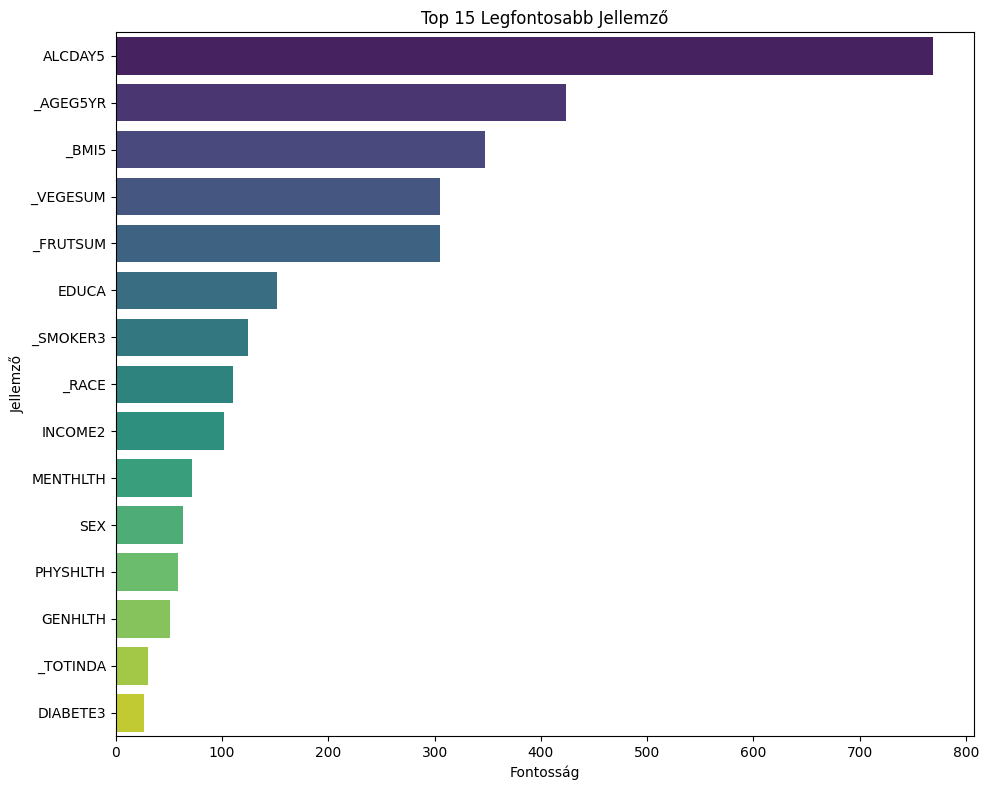

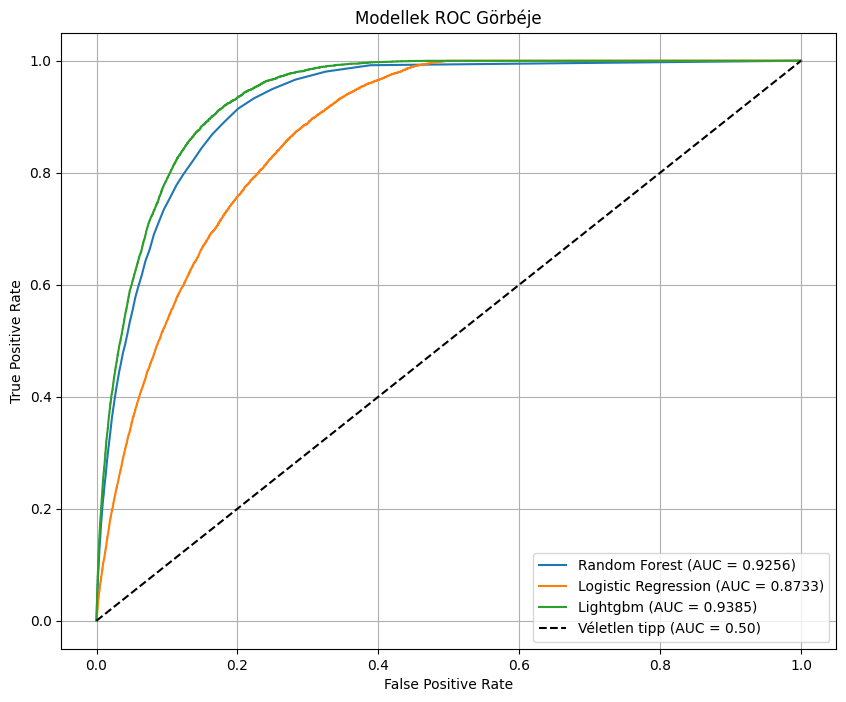


>>> 3. KOCKÁZATI PROFILOK ELEMZÉSE

--- Magas Kockázat ---
  Medián Korcsoport: 35-39
  Férfi Arány: 60.58%
  Jelenlegi Dohányosok Aránya: 33.53%
  Alacsony Jövedelműek Aránya (kat. <= 4): 19.40%
  Rossz Mentális Egészség (>14 nap): 70.59%

--- Alacsony Kockázat ---
  Medián Korcsoport: 55-59
  Férfi Arány: 41.26%
  Jelenlegi Dohányosok Aránya: 12.78%
  Alacsony Jövedelműek Aránya (kat. <= 4): 22.18%
  Rossz Mentális Egészség (>14 nap): 78.21%

>>> 4. EREDMÉNYEK MENTÉSE
Elemzésre kész adathalmaz mentve: brfss_2015_alcohol_analysis.csv

=== FOLYAMAT SIKERESEN BEFEJEZVE ===


In [22]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


BRFSS_YEAR = '2015'

FILE_PATH = f'/kaggle/input/behavioral-risk-factor-surveillance-system/{BRFSS_YEAR}.csv'


FEATURE_COLUMNS = [
    # Demográfia
    '_AGEG5YR', 'SEX', '_RACE', 'INCOME2', 'EDUCA',
    # Általános egészség
    'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1',
    # Életmód
    '_SMOKER3', '_TOTINDA',
    # Alkohol-specifikus (nem a problémát definiáló)
    'ALCDAY5', 'DRNKANY5',

    # Krónikus betegségek
    'DIABETE3', '_MICHD', 'CVDSTRK3',
    # BMI és táplálkozás
    '_BMI5', '_FRUTSUM', '_VEGESUM'
]

# Célváltozó neve
TARGET_COLUMN = 'alcohol_problem'


# --- 3. ADATELŐKÉSZÍTŐ FÜGGVÉNYEK ---

def clean_brfss_data(df, feature_cols, target_def_cols):
    """
    BRFSS specifikus kódok cseréje (pl. 9 -> NaN) és alapvető adattisztítás.

    Args:
        df (pd.DataFrame): A nyers DataFrame.
        feature_cols (list): A modellben használt oszlopok listája.
        target_def_cols (list): A célváltozó definíciójához használt oszlopok.

    Returns:
        pd.DataFrame: A tisztított DataFrame.
    """
    df_clean = df.copy()

    # BRFSS specifikus kódok, amelyek hiányzó vagy speciális értéket jelentenek.
    # Pl. 7, 9 = "Nem tudja" vagy "Megtagadta a választ"
    # 888 = "Soha" (alkoholfogyasztásnál)
    replace_dict = {
        7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan,
        777: np.nan, 999: np.nan, 888: 0,
        7777: np.nan, 9999: np.nan, 99999: np.nan
    }

    cols_to_clean = [col for col in feature_cols + target_def_cols if col in df_clean.columns] # Use only existing columns
    for col in cols_to_clean:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace(replace_dict)

    # DRNKANY5: Ivott-e alkoholt az elmúlt 30 napban? (1=Igen, 2=Nem)
    # Átkódoljuk 0/1 formátumra a könnyebb modellezhetőség érdekében.
    if 'DRNKANY5' in df_clean.columns:
        df_clean['DRNKANY5'] = df_clean['DRNKANY5'].replace({2: 0})

    return df_clean

def create_alcohol_target(df):
    """
    Célváltozó létrehozása: Problémás alkoholfogyasztás.
    A definíció a CDC (Centers for Disease Control and Prevention) ajánlásain alapul.
    Problémásnak tekintjük azt, aki legalább 2 kritériumnak megfelel.
    """
    problem_score = pd.Series(0, index=df.index)

    # Kritikus oszlopok ellenőrzése
    required_cols = ['_DRNKWEK', 'SEX', '_RFBING5', 'MAXDRNKS']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Hiányzó oszlopok a célváltozó képzéséhez: {missing_cols}")


    # 1. kritérium: Nagyivás (Heavy Drinking)
    # Férfiak: >14 ital/hét, Nők: >7 ital/hét.
    # _DRNKWEK 100-zal van szorozva (pl. 1400 = 14.00 ital).
    heavy_men = (df['SEX'] == 1) & (df['_DRNKWEK'] > 1400)
    heavy_women = (df['SEX'] == 2) & (df['_DRNKWEK'] > 700)
    problem_score += (heavy_men | heavy_women).astype(int)

    # 2. kritérium: Rohamivás (Binge Drinking)
    # _RFBING5: volt-e rohamivás az elmúlt 30 napban (1=Nem, 2=Igen)
    problem_score += (df['_RFBING5'] == 2).astype(int)

    # 3. kritérium: Extrém magas alkoholfogyasztás egy alkalommal
    # MAXDRNKS: legtöbb ital egy alkalommal az elmúlt 30 napban.
    high_max_men = (df['SEX'] == 1) & (df['MAXDRNKS'] > 6)
    high_max_women = (df['SEX'] == 2) & (df['MAXDRNKS'] > 5)
    problem_score += (high_max_men | high_max_women).astype(int)

    # Célváltozó: 1, ha a pontszám >= 2, egyébként 0.
    is_problem = (problem_score >= 2).astype(int)

    if is_problem.sum() == 0:
        print("FIGYELEM: A kritériumok alapján nem található problémás alkoholfogyasztó.")

    return is_problem


# --- 4. VIZUALIZÁCIÓS ÉS ELEMZŐ FÜGGVÉNYEK ---

def plot_model_results(results):
    """
    Modelleredmények vizualizálása: ROC görbék és metrikák.
    """
    plt.figure(figsize=(10, 8))
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(result['y_test'], result['probabilities'])
        plt.plot(fpr, tpr, label=f"{name.replace('_', ' ').title()} (AUC = {result['auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Véletlen tipp (AUC = 0.50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Modellek ROC Görbéje')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_feature_importance(model, feature_names):
    """
    Jellemző fontosság vizualizálása a legjobb modellhez.
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False).head(15)

        plt.figure(figsize=(10, 8))
        sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
        plt.title('Top 15 Legfontosabb Jellemző')
        plt.xlabel('Fontosság')
        plt.ylabel('Jellemző')
        plt.tight_layout()
        plt.show()
    else:
        print("A kiválasztott modell nem rendelkezik 'feature_importances_' attribútummal (pl. Logisztikus Regresszió).")


def create_risk_profiles(df, target_col):
    """
    Kockázati profilok létrehozása a magas és alacsony kockázatú csoportokra.
    """
    high_risk = df[df[target_col] == 1]
    low_risk = df[df[target_col] == 0]

    if high_risk.empty:
        print("Nincsenek magas kockázatú személyek a profilalkotáshoz.")
        return None

    # Korcsoport nevek a jobb olvashatóságért
    age_map = {
        1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44",
        6: "45-49", 7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69",
        11: "70-74", 12: "75-79", 13: "80+"
    }

    profiles = {
        'Magas Kockázat': {
            'Medián Korcsoport': age_map.get(high_risk['_AGEG5YR'].median(), 'N/A') if '_AGEG5YR' in high_risk.columns else 'N/A',
            'Férfi Arány': (high_risk['SEX'] == 1).mean() if 'SEX' in high_risk.columns else 'N/A',
            'Jelenlegi Dohányosok Aránya': (high_risk['_SMOKER3'].isin([1, 2])).mean() if '_SMOKER3' in high_risk.columns else 'N/A', # 1=minden nap, 2=néhány nap
            'Alacsony Jövedelműek Aránya (kat. <= 4)': (high_risk['INCOME2'] <= 4).mean() if 'INCOME2' in high_risk.columns else 'N/A',
            'Rossz Mentális Egészség (>14 nap)': (high_risk['MENTHLTH'] > 14).mean() if 'MENTHLTH' in high_risk.columns else 'N/A',
        },
        'Alacsony Kockázat': {
            'Medián Korcsoport': age_map.get(low_risk['_AGEG5YR'].median(), 'N/A') if '_AGEG5YR' in low_risk.columns else 'N/A',
            'Férfi Arány': (low_risk['SEX'] == 1).mean() if 'SEX' in low_risk.columns else 'N/A',
            'Jelenlegi Dohányosok Aránya': (low_risk['_SMOKER3'].isin([1, 2])).mean() if '_SMOKER3' in low_risk.columns else 'N/A',
            'Alacsony Jövedelműek Aránya (kat. <= 4)': (low_risk['INCOME2'] <= 4).mean() if 'INCOME2' in low_risk.columns else 'N/A',
            'Rossz Mentális Egészség (>14 nap)': (low_risk['MENTHLTH'] > 14).mean() if 'MENTHLTH' in low_risk.columns else 'N/A',
        }
    }
    return profiles

# --- 5. GÉPI TANULÁSI MŰVELETEK ---

class AlcoholPredictionPipeline:
    """
    Gépi tanulási folyamat becsomagolása egy osztályba a jobb szervezettségért.
    """
    def __init__(self__(self):
        self.models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
            'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
            'LightGBM': lgb.LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
        }
        self.scaler = StandardScaler()
        self.best_model = None
        self.results = {}

    def prepare_data(self, df, target_col, feature_cols):
        """Adatok előkészítése: hiányzó értékek pótlása és szétválasztás."""
        # Use only existing feature columns
        existing_feature_cols = [col for col in feature_cols if col in df.columns]
        if not existing_feature_cols:
            raise ValueError("None of the specified feature columns are present in the DataFrame.")

        X = df[existing_feature_cols].copy()
        y = df[target_col].copy()

        # Hiányzó értékek pótlása mediánnal (egyszerű, de robusztus stratégia)
        X = X.apply(lambda x: x.fillna(x.median()), axis=0)
        return X, y

    def train_and_evaluate(self, X, y):
        """Modellek tanítása és kiértékelése."""
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        for name, model in self.models.items():
            print(f"\n--- {name} tanítása ---")

            # A Logisztikus Regresszió skálázott adatokat igényel, a fa alapúak nem.
            if name == 'Logistic Regression':
                model.fit(X_train_scaled, y_train)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                model.fit(X_train, y_train)
                y_pred_proba = model.predict_proba(X_test)[:, 1]

            y_pred = (y_pred_proba >= 0.5).astype(int) # Standard 0.5 küszöb

            # Metrikák számítása
            auc = roc_auc_score(y_test, y_pred_proba)
            self.results[name] = {
                'model': model,
                'auc': auc,
                'probabilities': y_pred_proba,
                'y_test': y_test
            }

            print(f"AUC: {auc:.4f}")
            print("Klasszifikációs jelentés:")
            print(classification_report(y_test, y_pred, target_names=['Normál', 'Problémás']))

        # Legjobb modell kiválasztása AUC alapján
        best_name = max(self.results, key=lambda name: self.results[name]['auc'])
        self.best_model = self.results[best_name]['model']
        print(f"\nA legjobb modell: {best_name} (AUC: {self.results[best_name]['auc']:.4f})")

        # Jellemző fontosság vizualizálása a legjobb modellhez
        plot_feature_importance(self.best_model, X.columns)

        # ROC görbék kirajzolása
        plot_model_results(self.results)


# --- 6. FŐPROGRAM ---

def main():
    """
    A teljes adatfeldolgozási és modellezési folyamat futtatása.
    """
    print(">>> 1. ADATOK BETÖLTÉSE ÉS ELŐKÉSZÍTÉSE")
    try:
        df = pd.read_csv(FILE_PATH, low_memory=False)
        print(f"Adatok betöltve: {df.shape[0]} sor, {df.shape[1]} oszlop.")
    except FileNotFoundError:
        print(f"HIBA: A fájl nem található: {FILE_PATH}")
        print("Kérjük, ellenőrizze az útvonalat vagy futtassa a kódot Kaggle Notebook-ban.")
        return

    # Adattisztítás
    target_def_cols = ['_DRNKWEK', 'MAXDRNKS', '_RFBING5', 'SEX'] # Added SEX as it's used in target definition
    df_clean = clean_brfss_data(df, FEATURE_COLUMNS, target_def_cols)

    # Célváltozó létrehozása
    try:
        df_clean[TARGET_COLUMN] = create_alcohol_target(df_clean)
    except ValueError as e:
        print(f"HIBA a célváltozó képzése során: {e}")
        return


    problem_rate = df_clean[TARGET_COLUMN].mean()
    print(f"Problémás alkoholfogyasztás aránya: {problem_rate:.2%}")
    if problem_rate == 0:
        print("Nem találhatóak problémás esetek, a modellezés kihagyva.")
        return

    print("\n>>> 2. MODELLEZÉS")
    pipeline = AlcoholPredictionPipeline()
    try:
        X, y = pipeline.prepare_data(df_clean, TARGET_COLUMN, FEATURE_COLUMNS)
        pipeline.train_and_evaluate(X, y)
    except ValueError as e:
        print(f"HIBA a modell előkészítése/tanítása során: {e}")
        return


    print("\n>>> 3. KOCKÁZATI PROFILOK ELEMZÉSE")
    profiles = create_risk_profiles(df_clean, TARGET_COLUMN)
    if profiles:
        for risk_type, profile_data in profiles.items():
            print(f"\n--- {risk_type} ---")
            for key, value in profile_data.items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.2%}")
                else:
                    print(f"  {key}: {value}")

    print("\n>>> 4. EREDMÉNYEK MENTÉSE")
    # A teljes, tisztított adathalmaz mentése a célváltozóval
    df_clean.to_csv('brfss_2015_alcohol_analysis.csv', index=False)
    print("Elemzésre kész adathalmaz mentve: brfss_2015_alcohol_analysis.csv")

    print("\n=== FOLYAMAT SIKERESEN BEFEJEZVE ===")

if __name__ == "__main__":
    main()